# Data ingestion

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [32]:
data=pd.read_csv("https://raw.githubusercontent.com/aniruddhachoudhury/Red-Wine-Quality/master/winequality-red.csv")

In [33]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [143]:
data.shape

(1599, 12)

# EDA

In [34]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [35]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [37]:
data.quality.nunique()     #This is multiclass classification.

6

In [38]:
data.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [39]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

# Sepersting the continuous features & Output feature

In [40]:
con_features=data.drop('quality',axis=1)
op_feature=data[['quality']]
con_features.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [41]:
op_feature.head()

,quality
0,5
1,5
2,5
3,6
4,5


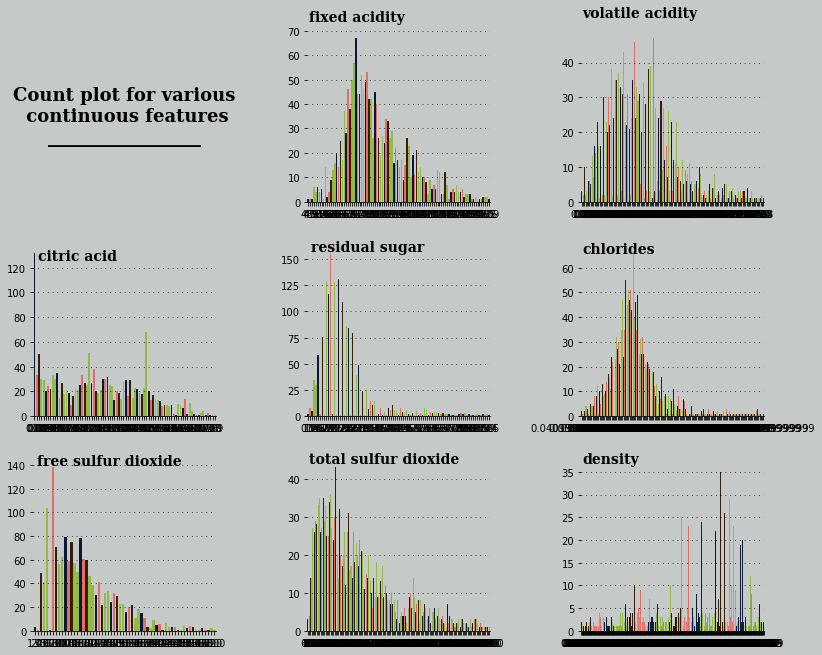

In [42]:
fig = plt.figure(figsize=(18,15))
grid_size = fig.add_gridspec(4,4)
grid_size.update(wspace=0.5, hspace=0.25)  #plotting countplots for checking frequeny w.r.t eeach continuous features.
ax0 = fig.add_subplot(grid_size[0,0])
ax1 = fig.add_subplot(grid_size[0,1])
ax2 = fig.add_subplot(grid_size[0,2])
ax3 = fig.add_subplot(grid_size[1,0])
ax4 = fig.add_subplot(grid_size[1,1])
ax5 = fig.add_subplot(grid_size[1,2])
ax6 = fig.add_subplot(grid_size[2,0])
ax7 = fig.add_subplot(grid_size[2,1])
ax8 = fig.add_subplot(grid_size[2,2])

background_color = "#C5C9C7"
color_palette = ["#01153E","#FC5A50","#3D1C02","#9ACD32","#9ACD32"]
fig.patch.set_facecolor(background_color) 
ax0.set_facecolor(background_color) 
ax1.set_facecolor(background_color) 
ax2.set_facecolor(background_color) 
ax3.set_facecolor(background_color) 
ax4.set_facecolor(background_color) 
ax5.set_facecolor(background_color) 
ax6.set_facecolor(background_color) 
ax7.set_facecolor(background_color) 
ax8.set_facecolor(background_color) 

# Title of the plot
ax0.spines["bottom"].set_visible(False)
ax0.grid(color='#C5C9C7', linestyle=':', axis='x', zorder=0,  dashes=(1,5))
ax0.grid(color='#C5C9C7', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
ax0.spines["left"].set_visible(False)
ax0.spines["top"].set_visible(False)
ax0.spines["right"].set_visible(False)
ax0.tick_params(left=False, bottom=False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.text(0.5,0.5,
         'Count plot for various\n continuous features\n_________________',
         horizontalalignment='center',
         verticalalignment='center',
         fontsize=18, fontweight='bold',
         fontfamily='serif',
         color="#000000")

# fixed acidity count
ax1.text(0.3, 74, 'fixed acidity', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax1,data=data,x='fixed acidity',palette=color_palette)
ax1.set_xlabel("")
ax1.set_ylabel("")

# volatile acidity 
ax2.text(0.3, 53, 'volatile acidity', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax2.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax2,data=data,x='volatile acidity',palette=color_palette)
ax2.set_xlabel("")
ax2.set_ylabel("")

# citric acid
ax3.text(1.5, 126, 'citric acid', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax3.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax3,data=data,x='citric acid',palette=color_palette)
ax3.set_xlabel("")
ax3.set_ylabel("")

# residual sugar
ax4.text(1.5, 158, 'residual sugar', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax4.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax4,data=data,x='residual sugar',palette=color_palette)
ax4.set_xlabel("")
ax4.set_ylabel("")

# chlorides
ax5.text(0.5, 66, 'chlorides', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax5.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax5,data=data,x='chlorides',palette=color_palette)
ax5.set_xlabel("")
ax5.set_ylabel("")

# free sulfur dioxide
ax6.text(0.75, 140, 'free sulfur dioxide', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax6.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax6,data=data,x='free sulfur dioxide',palette=color_palette)
ax6.set_xlabel("")
ax6.set_ylabel("")

# total sulfur dioxide
ax7.text(0.85, 44, 'total sulfur dioxide', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax7.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax7,data=data,x='total sulfur dioxide',palette=color_palette)
ax7.set_xlabel("")
ax7.set_ylabel("")

# density
ax8.text(1.5, 37, 'density', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax8.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax8,data=data,x='density',palette=color_palette)
ax8.set_xlabel("")
ax8.set_ylabel("")

for s in ["top","right","left"]:
    ax1.spines[s].set_visible(False)
    ax2.spines[s].set_visible(False)
    ax3.spines[s].set_visible(False)
    ax4.spines[s].set_visible(False)
    ax5.spines[s].set_visible(False)
    ax6.spines[s].set_visible(False)
    ax7.spines[s].set_visible(False)
    ax8.spines[s].set_visible(False)

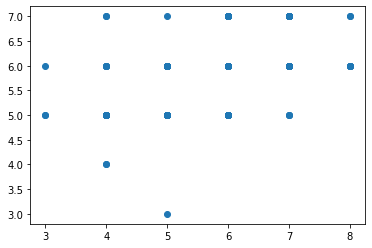

In [309]:
plt.scatter(y_test,y_predict2)        

In [ ]:
sns.displot(residuals,kind="kde")  

In [310]:
residuals=y_test-y_predict

ValueError: Unable to coerce to Series, length must be 1: given 544

In [245]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(con_features,op_feature,random_state=99,test_size=.34)

In [246]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [252]:
x_train_transform=scaler.fit_transform(x_train) 
x_test_transform=scaler.transform(x_test) 
x_train_transform,x_test_transform

(array([[ 1.63564446, -0.87027824,  0.66663266, ..., -1.40568295,
          0.79795938, -1.06883207],
        [-0.70521682, -1.04084706,  0.00782974, ...,  0.89422824,
         -1.07554424, -0.97722534],
        [ 1.74711404, -0.98399079,  1.07204985, ...,  0.06370475,
          1.44197625,  0.48848242],
        ...,
        [-1.20682995, -0.75656569,  0.76798696, ...,  0.89422824,
          1.20778829,  0.67169589],
        [ 0.29800944, -0.24485922,  1.27475844, ..., -0.63904588,
         -0.43152737,  1.4961565 ],
        [ 0.6324182 ,  0.38055979,  0.81866411, ...,  0.95811466,
         -0.19733942, -0.8856186 ]]),
 array([[-0.87242119, -0.3017155 , -1.00571322, ..., -0.06406809,
         -0.08024545, -0.79401187],
        [ 0.18653986, -1.21141589,  0.92001841, ...,  0.31925044,
          0.56377142, -0.33597819],
        [ 0.29800944,  0.38055979,  0.56527837, ...,  0.38313686,
         -0.49007436, -0.15276472],
        ...,
        [-0.0921341 , -0.58599687,  1.07204985, ...,  

# SVC- support vector classifier

In [278]:
from sklearn.svm import SVC
model_1=SVC()                          #creating Model with help of sklearn(support vector machines).

In [279]:
model_1.fit(x_train_transform,y_train)           #fitting the model by Traing data.

C:\Users\Student\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [280]:
model_1.score(x_train_transform,y_train)   #checking the score of Training model.

0.6672985781990521

In [305]:
y_predict_1=model_1.predict(x_test_transform)   #predicting the values based on x_test data.
y_predict_1

array([6, 6, 5, 6, 5, 5, 5, 5, 5, 6, 6, 5, 5, 5, 6, 5, 5, 5, 5, 5, 5, 6,
       6, 5, 5, 5, 5, 5, 5, 6, 5, 5, 6, 5, 5, 5, 6, 6, 5, 5, 6, 6, 5, 5,
       6, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 5, 6, 6, 6, 5, 5, 6, 6, 5, 5, 5,
       5, 5, 6, 6, 5, 5, 6, 6, 5, 5, 5, 6, 5, 5, 6, 5, 5, 5, 6, 6, 5, 6,
       5, 5, 5, 5, 5, 5, 5, 7, 6, 7, 6, 5, 6, 5, 6, 6, 5, 7, 5, 6, 7, 5,
       6, 5, 5, 6, 6, 5, 5, 5, 5, 6, 5, 6, 5, 6, 6, 6, 5, 5, 5, 6, 5, 5,
       5, 5, 6, 6, 5, 5, 5, 5, 7, 6, 5, 6, 6, 6, 5, 6, 6, 7, 5, 5, 6, 5,
       5, 5, 6, 6, 5, 6, 5, 6, 5, 6, 6, 6, 5, 5, 5, 7, 5, 5, 7, 6, 5, 6,
       6, 5, 6, 6, 6, 5, 5, 5, 5, 6, 7, 5, 5, 5, 7, 5, 5, 6, 5, 5, 6, 5,
       5, 6, 6, 5, 6, 6, 5, 5, 5, 6, 5, 5, 5, 7, 6, 5, 5, 5, 6, 5, 5, 5,
       5, 6, 5, 5, 5, 6, 6, 5, 7, 5, 6, 5, 6, 6, 6, 6, 5, 6, 5, 5, 6, 6,
       5, 5, 5, 6, 5, 6, 5, 5, 5, 5, 5, 7, 5, 6, 6, 7, 5, 5, 6, 5, 5, 5,
       6, 5, 6, 5, 5, 6, 5, 6, 5, 5, 5, 6, 5, 5, 6, 7, 5, 6, 6, 5, 6, 6,
       6, 6, 6, 5, 5, 5, 5, 6, 5, 6, 6, 5, 5, 5, 6,

In [282]:
from sklearn.metrics import accuracy_score

In [306]:
accuracy_score(y_test,y_predict_1)

0.6213235294117647

In [284]:
scaler.mean_

array([ 8.36530806,  0.52306635,  0.27845498,  2.5456872 ,  0.08787867,
       15.97203791, 46.63933649,  0.99676033,  3.31002844,  0.66370616,
       10.46676145])

# Logistic Regression

In [288]:
from sklearn.linear_model import LogisticRegression

In [289]:
model_2=LogisticRegression()

In [290]:
model_2.fit(x_train_transform, y_train)

C:\Users\Student\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Student\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [292]:
y_predict2=model_2.predict(x_test_transform)       #predicting the values based on the x_test_transform.
y_predict2

array([6, 6, 5, 6, 7, 6, 5, 5, 5, 6, 7, 5, 5, 5, 6, 5, 5, 5, 5, 5, 5, 6,
       6, 5, 5, 5, 5, 5, 5, 6, 6, 5, 6, 5, 5, 5, 6, 5, 5, 5, 6, 7, 5, 5,
       6, 6, 6, 5, 6, 5, 5, 5, 5, 6, 6, 5, 6, 6, 6, 5, 5, 6, 6, 5, 5, 5,
       6, 5, 5, 5, 5, 5, 6, 6, 5, 5, 5, 5, 5, 5, 6, 5, 6, 5, 7, 6, 5, 6,
       5, 5, 6, 5, 5, 5, 6, 7, 6, 7, 6, 5, 6, 5, 5, 6, 4, 7, 5, 6, 7, 6,
       6, 5, 5, 6, 5, 5, 6, 5, 6, 6, 5, 6, 5, 6, 6, 6, 5, 5, 5, 6, 5, 5,
       5, 5, 5, 6, 5, 5, 5, 5, 7, 6, 5, 6, 6, 6, 5, 6, 5, 7, 5, 5, 6, 5,
       5, 5, 6, 6, 5, 6, 5, 6, 5, 6, 5, 5, 5, 5, 5, 7, 5, 5, 7, 6, 5, 6,
       7, 5, 6, 6, 6, 5, 6, 5, 3, 6, 7, 5, 5, 6, 7, 5, 6, 5, 5, 5, 6, 5,
       5, 6, 6, 5, 6, 6, 5, 5, 5, 6, 6, 6, 5, 7, 6, 5, 5, 5, 6, 5, 6, 5,
       5, 5, 5, 5, 5, 7, 6, 5, 7, 5, 7, 5, 6, 6, 5, 6, 5, 6, 5, 5, 6, 6,
       5, 5, 5, 6, 5, 5, 5, 6, 5, 5, 5, 7, 5, 7, 6, 7, 5, 5, 6, 5, 5, 5,
       7, 5, 6, 5, 5, 6, 4, 7, 5, 5, 5, 6, 5, 5, 5, 7, 5, 6, 6, 5, 6, 6,
       6, 6, 6, 6, 6, 5, 5, 6, 5, 6, 6, 5, 5, 5, 6,

In [293]:
accuracy_score(y_test,y_predict2)        #checking accuracy_score.

0.6011029411764706

In [294]:
from sklearn.metrics import precision_score    #calculating precision_score.

In [295]:
precision_score(y_test,y_predict,average='weighted')

C:\Users\Student\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.5758426273193842

In [296]:
from sklearn.metrics import recall_score

In [297]:
recall_score(y_test,y_predict,average='weighted')   #calculating recall_score.

0.6213235294117647

In [218]:
from sklearn.metrics import fbeta_score

In [304]:
fbeta_score(y_test,y_predict,beta=1,average='weighted')      #calculating fbeta_score

0.5925928382991006